In [1]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#lire les données depuis le fichier data.csv
df_brut = pd.read_csv('data.csv')
#Filtrer les données pour en garder que les classes S et D

df = df_brut[(df_brut['Phase'] == "'D'") | (df_brut['Phase'] == "'S'")] 

#spécifier le x(features) et le y (réponse)
X = np.array(df.drop(['Phase'], 1))
y = np.array(df['Phase'])

In [3]:
# 10-fold cross-validation avec K=5 pour KNN (valeur par defaut)
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X, y, cv=3, scoring='accuracy')
print(scores)

[0.81243414 0.7042699  0.74314346]


In [4]:
#Afficher la moyenne
print(scores.mean())

0.7532825003195772


In [5]:
# chercher la valeur optimale pour k(le nombre de voisins)
k_range = list(range(1, 121))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

Text(0, 0.5, 'score pour cross_validation')

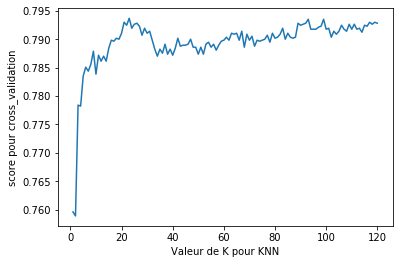

In [6]:
# afficher 
plt.plot(k_range, k_scores)
plt.xlabel('Valeur de K pour KNN')
plt.ylabel('score pour cross_validation')

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
# definir les valeurs du parametre k sur lesquels on cherche
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [9]:
# créer une grille de parametres
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [10]:
# instancier GridSearch
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, n_jobs = -1)

In [11]:
# passer les données au gridSearch
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=120, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [12]:
# voir les resultats dans un tableau pandas
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.759620,0.052793,{'n_neighbors': 1}
1,0.758918,0.051167,{'n_neighbors': 2}
2,0.778422,0.055885,{'n_neighbors': 3}
3,0.778246,0.056920,{'n_neighbors': 4}
4,0.783518,0.050853,{'n_neighbors': 5}
5,0.785099,0.054742,{'n_neighbors': 6}
6,0.784396,0.051713,{'n_neighbors': 7}
7,0.785626,0.055071,{'n_neighbors': 8}
8,0.787911,0.052846,{'n_neighbors': 9}
9,0.783869,0.055368,{'n_neighbors': 10}


In [13]:
# afficher l'ensemble la moyenne du score pourchaque ensemble de parametre
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.75962045 0.75891759 0.77842207 0.77824635 0.78351784 0.78509928
 0.78439642 0.78562643 0.78791074 0.78386927 0.78720787 0.78615358
 0.78703216 0.78615358 0.78843788 0.78984361 0.7896679  0.79019504
 0.79001933 0.79107363 0.7930065  0.79247935 0.79370937 0.79195221
 0.79265507 0.79283079 0.79230364 0.79072219 0.79195221 0.79107363]


Text(0, 0.5, 'Cross-Validated Accuracy')

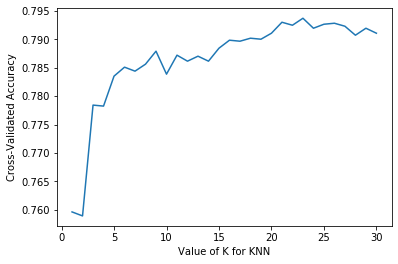

In [14]:
# les re
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [15]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7937093656650852
{'n_neighbors': 23}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')


In [25]:
# definir les parametres sur lesquels nous allons faire la recherche
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
algorithme = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric = ['euclidean', 'manhattan']
p =[1,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [26]:
# creer une grille de parametres
param_grid = dict(n_neighbors=k_range, weights=weight_options, algorithm=algorithme, p=p, metric=metric)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2], 'metric': ['euclidean', 'manhattan']}


In [27]:
#utiliser miltiprocessing pour paralléliser le traitement 
import multiprocessing
n_jobs = multiprocessing.cpu_count()-1
# instantier et passer les donnée au gridsearch
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, n_jobs=n_jobs)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=120, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=7,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', ve

In [28]:
#faire une prédiction sur le x_test
predictions = grid.predict(X_test)

In [29]:
# voir les résultas
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.876318,0.018074,"{'algorithm': 'auto', 'metric': 'euclidean', '..."
1,0.876318,0.018074,"{'algorithm': 'auto', 'metric': 'euclidean', '..."
2,0.876318,0.018074,"{'algorithm': 'auto', 'metric': 'euclidean', '..."
3,0.876318,0.018074,"{'algorithm': 'auto', 'metric': 'euclidean', '..."
4,0.849517,0.021855,"{'algorithm': 'auto', 'metric': 'euclidean', '..."
...,...,...,...
955,0.861380,0.017168,"{'algorithm': 'brute', 'metric': 'manhattan', ..."
956,0.842707,0.017387,"{'algorithm': 'brute', 'metric': 'manhattan', ..."
957,0.861160,0.019224,"{'algorithm': 'brute', 'metric': 'manhattan', ..."
958,0.842707,0.017387,"{'algorithm': 'brute', 'metric': 'manhattan', ..."


In [30]:
# examiner le meilleur model (ensemble de parametres)
print(grid.best_params_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


In [31]:
#calculer le score sur l'ensemble du test
clf = neighbors.KNeighborsClassifier(algorithm='auto', metric='manhattan', n_neighbors=4, weights='distance', p=1)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9086918349429324


In [32]:
#afficher la matrice de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[518  45]
 [ 59 517]]
              precision    recall  f1-score   support

         'D'       0.90      0.92      0.91       563
         'S'       0.92      0.90      0.91       576

    accuracy                           0.91      1139
   macro avg       0.91      0.91      0.91      1139
weighted avg       0.91      0.91      0.91      1139

